<a href="https://colab.research.google.com/github/Saamzs/codes1/blob/main/Used_cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import kagglehub
avikasliwal_used_cars_price_prediction_path = kagglehub.dataset_download('avikasliwal/used-cars-price-prediction')

print('Data source import complete.')


Data source import complete.


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/.nfs000000001d5c7e050000008a
/kaggle/input/used-cars-price-prediction/train-data.csv


## Import some libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

### Remove warnings

In [9]:
import warnings
warnings.simplefilter('ignore')

In [10]:
df = pd.read_csv('/kaggle/input/used-cars-price-prediction/train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Exploring the data

In [11]:
df.shape

(6019, 14)

In [12]:
df.isna().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


In [13]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [14]:
df.describe(include = object)

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


#### drop the unnecessary columns and with many null values

In [17]:
df.drop(['Unnamed: 0' ,'New_Price' ] , axis = 1 , inplace = True )

In [19]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df['Name'].value_counts()

,count
Name,
Mahindra XUV500 W8 2WD,49
Maruti Swift VDI,45
Honda City 1.5 S MT,34
Maruti Swift Dzire VDI,34
Maruti Swift VDI BSIV,31
...,...
Hyundai i20 2015-2017 Magna,1
Tata Indica LEI,1
Mercedes-Benz GLA Class 200 Sport,1


In [22]:
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])
df['Model'] = df['Name'].apply(lambda x: x.split()[1])
print('Brand Feature : ' , df['Brand'].nunique())
print('Model Feature : ' , df['Model'].nunique())

Brand Feature :  31
Model Feature :  212


In [23]:
#drop the Name column
df.drop('Name' , axis = 1 , inplace = True )

In [24]:
df['Age'] = 2020 - df['Year']

<Axes: xlabel='Age', ylabel='Count'>

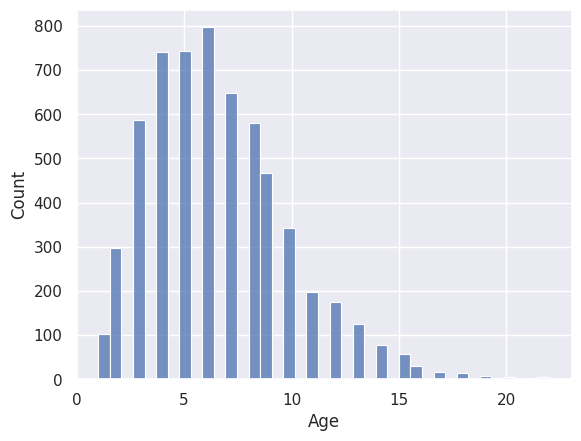

In [25]:
sns.histplot(data = df, x = 'Age')

In [26]:
df.dtypes

,0
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,object
Engine,object
Power,object
Seats,float64


#### convert Engine and Power columns to numeric type

In [27]:
df['Engine'].value_counts()

,count
Engine,
1197 CC,606
1248 CC,512
1498 CC,304
998 CC,259
2179 CC,240
...,...
5998 CC,1
2092 CC,1
5204 CC,1


In [28]:
df['Power'].value_counts()

,count
Power,
74 bhp,235
98.6 bhp,131
73.9 bhp,125
140 bhp,123
78.9 bhp,111
...,...
130.3 bhp,1
161.6 bhp,1
488.1 bhp,1


In [29]:
df['Engine'] = df['Engine'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)
df['Power'] = df['Power'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)

In [30]:
df['Engine'] = pd.to_numeric(df['Engine'] , errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [31]:
df['Seats'].value_counts()

,count
Seats,
5.0,5014
7.0,674
8.0,134
4.0,99
6.0,31
2.0,16
10.0,5
9.0,3
0.0,1


In [32]:
df.drop(df[df['Seats'] == 0].index , axis = 0 , inplace = True)

In [34]:
df['Seats'].value_counts()

,count
Seats,
5.0,5014
7.0,674
8.0,134
4.0,99
6.0,31
2.0,16
10.0,5
9.0,3


In [33]:
df.isna().sum()

,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,142
Seats,42


<Axes: xlabel='price_usd'>

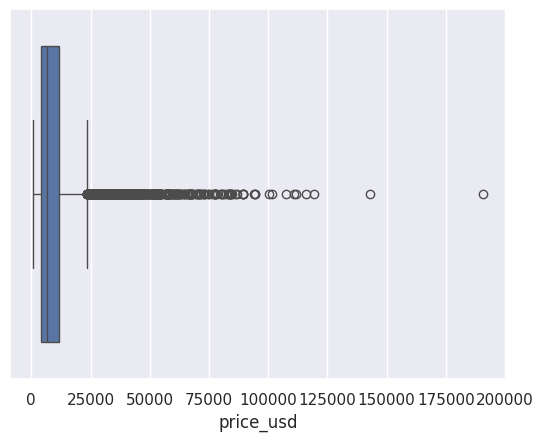

In [36]:
df['price_usd'] = df['Price'] * 1193.15
sns.boxplot(data = df, x = 'price_usd')

In [35]:
df['Mileage'].value_counts()

,count
Mileage,
18.9 kmpl,172
17.0 kmpl,172
18.6 kmpl,119
20.36 kmpl,88
21.1 kmpl,86
...,...
23.57 kmpl,1
14.53 km/kg,1
12.85 kmpl,1


### convert Mileage from km/kg to kmpl

In [37]:
def mileage_convert(x):
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0])*1.40 #formula
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return np.nan

df['Mileage(kmpl)'] = df['Mileage'].apply(mileage_convert)

In [38]:
df['Mileage(kmpl)'].isna().sum()

np.int64(2)

In [39]:
df.drop(['Mileage', 'Year', 'price_usd'], axis = 1, inplace = True)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,Age,Mileage(kmpl)
0,Mumbai,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,10,37.24
1,Pune,41000,Diesel,Manual,First,1582.0,126.20,5.0,12.50,Hyundai,Creta,5,19.67
2,Chennai,46000,Petrol,Manual,First,1199.0,88.70,5.0,4.50,Honda,Jazz,9,18.20
3,Chennai,87000,Diesel,Manual,First,1248.0,88.76,7.0,6.00,Maruti,Ertiga,8,20.77
4,Coimbatore,40670,Diesel,Automatic,Second,1968.0,140.80,5.0,17.74,Audi,A4,7,15.20


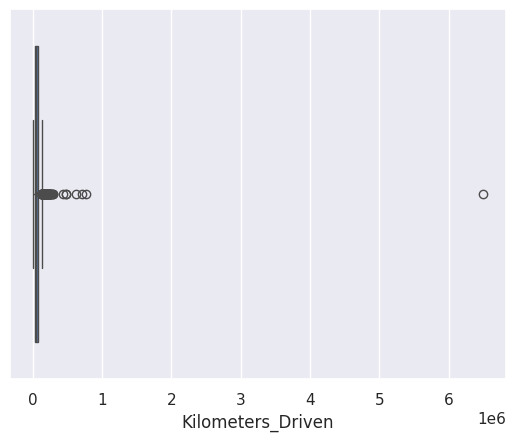

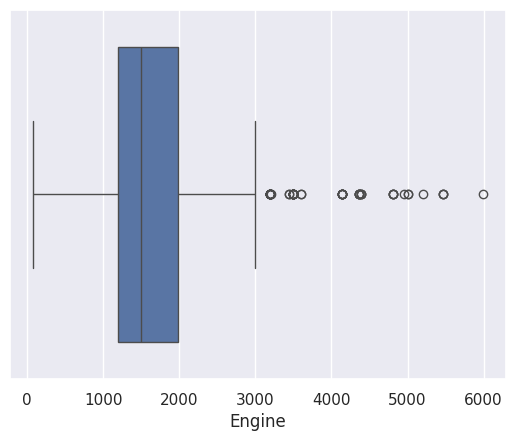

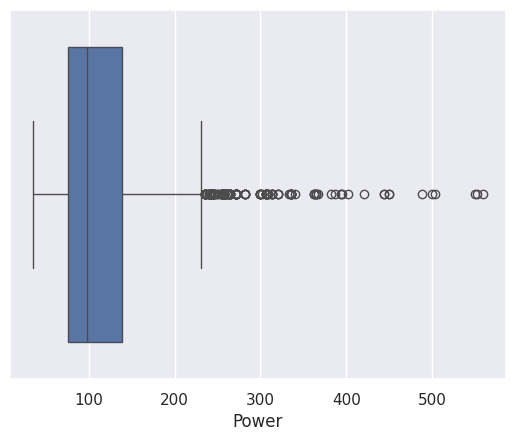

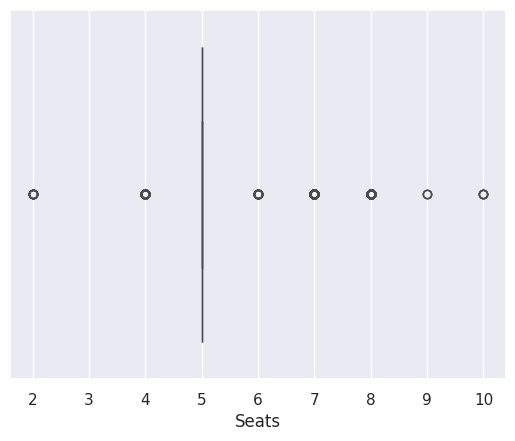

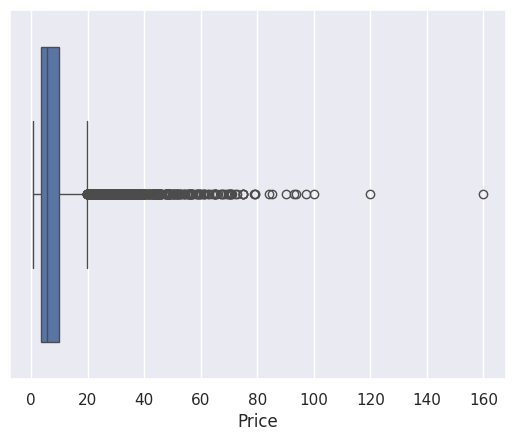

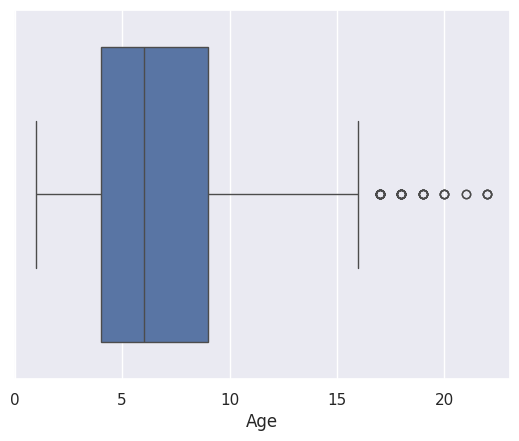

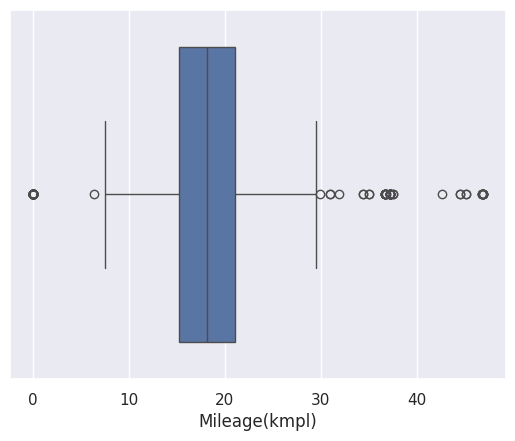

In [40]:
for col in df.select_dtypes (exclude = 'object').columns:
    sns.boxplot(data = df, x = col)
    plt.show()

### there are outliers let's handling that

In [41]:
df['Kilometers_Driven'].quantile([0.7, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 1])

,Kilometers_Driven
0.700,68374.00
0.800,79000.00
0.900,96893.60
0.950,120000.00
0.990,172838.50
0.995,201905.03
0.999,442535.00
1.000,6500000.00


In [42]:
df['Kilometers_Driven'].quantile(0.999)

np.float64(442535.0000001572)

<Axes: xlabel='Kilometers_Driven'>

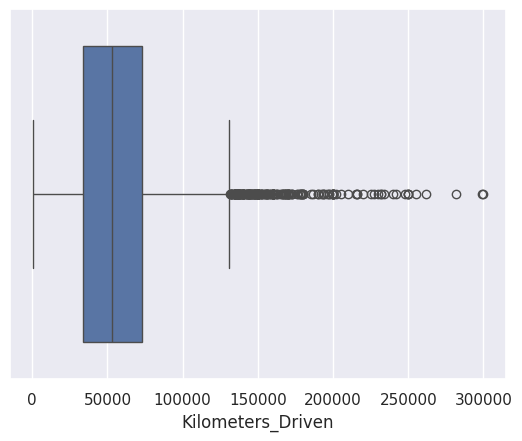

In [44]:
df2 = df[df['Kilometers_Driven'] < df['Kilometers_Driven'].quantile(0.999)]
sns.boxplot(data = df2, x = 'Kilometers_Driven')

In [45]:
def outliers_handling(x, p1=0.25, p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x[(x > min_limit) & (x < max_limit)]

In [46]:
df3 = df2.copy()
for col in [ 'Engine', 'Power', 'Mileage(kmpl)']:
    df3[col] = outliers_handling(df3[col])

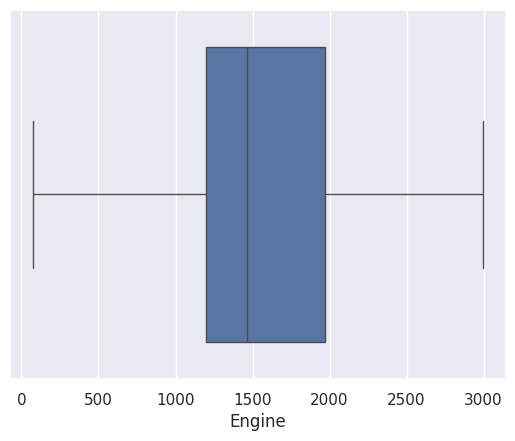

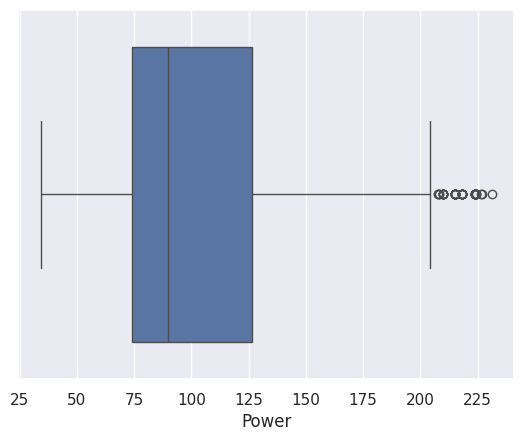

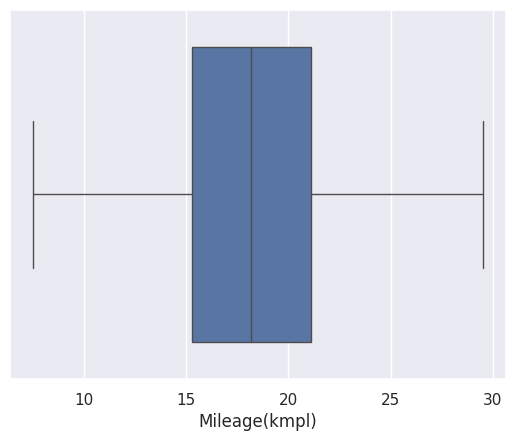

In [47]:
for col in [ 'Engine', 'Power', 'Mileage(kmpl)']:
    sns.boxplot(data = df3, x = col)
    plt.show()

In [48]:
df3.describe()

,Kilometers_Driven,Engine,Power,Seats,Price,Age,Mileage(kmpl)
count,6011.000000,5915.000000,5632.000000,5969.000000,6011.000000,6011.000000,5893.000000
mean,57128.815671,1597.196619,106.217892,5.279946,9.471863,6.641823,18.290521
std,33762.168430,551.140267,40.717069,0.806435,11.170990,3.270903,4.098875
min,171.000000,72.000000,34.200000,2.000000,0.440000,1.000000,7.500000
25%,34000.000000,1197.000000,74.000000,5.000000,3.500000,4.000000,15.300000
50%,53000.000000,1462.000000,90.000000,5.000000,5.640000,6.000000,18.200000
75%,73000.000000,1968.000000,126.320000,5.000000,9.950000,9.000000,21.100000
max,300000.000000,2999.000000,231.100000,10.000000,160.000000,22.000000,29.540000


In [49]:
df3.describe(include = object)

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
count,6011,6011,6011,6011,6011,6011
unique,11,5,2,4,31,212
top,Mumbai,Diesel,Manual,First,Maruti,Swift
freq,790,3201,4295,4921,1211,353


In [50]:
df3.to_csv('cleaned_data.csv', index = False)

## Data Splitting

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
X = df3.drop('Price', axis = 1)
y = df3['Price']

In [53]:
# Log-transform target to handle skewness
y = np.log(y)

In [54]:
num_cols = X.select_dtypes(exclude = 'object').columns.tolist()
print(num_cols)

['Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Age', 'Mileage(kmpl)']


In [55]:
num_cols = ['Kilometers_Driven', 'Engine', 'Power', 'Age', 'Mileage(kmpl)']

In [56]:
nominal_cols = ['Location', 'Fuel_Type', 'Transmission', 'Brand']
ordinal_cols = ['Seats', 'Owner_Type']

In [57]:
# Split into train+valid and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state=42)
# Split train into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [58]:
X_train.shape , X_test.shape

((3846, 12), (1203, 12))

In [59]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('poly', PolynomialFeatures(degree=2)),  # Reduced degree to avoid overfitting
        ('scaler', StandardScaler())
    ])
ordinal_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])
nominal_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
    ])
preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_cols),
        ('ordinal', ordinal_pipeline, ordinal_cols),
        ('nominal', nominal_pipeline, nominal_cols)
    ]).set_output(transform='pandas')

In [60]:
# Preprocess data
X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)
X_test_prep = preprocessor.transform(X_test)

### Define the models

In [61]:
models = [
        ('Linear Regression', LinearRegression()),
        ('Ridge', Ridge(alpha=1.0)),  # Adjusted alpha
        ('Lasso', Lasso(alpha=0.1))   # Adjusted alpha
    ]

## Train and evaluate models

In [62]:
def train_and_evaluate_model(model, X_train, X_valid, X_test, y_train, y_valid, y_test, model_name):
    """Train and evaluate a model, printing metrics."""
    model.fit(X_train, y_train)

    # Training metrics
    train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

    # Validation metrics
    valid_pred = model.predict(X_valid)
    valid_r2 = r2_score(y_valid, valid_pred)
    valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))

    # Test metrics
    test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Training R²: {train_r2:.4f}, RMSE: {train_rmse:.4f}")
    print(f"Validation R²: {valid_r2:.4f}, RMSE: {valid_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}, RMSE: {test_rmse:.4f}")
    return model, test_r2, test_rmse

In [63]:
# Train and evaluate models
best_model = None
best_r2 = -float('inf')

In [64]:
for model_name, model in models:
    trained_model, test_r2, test_rmse = train_and_evaluate_model(
        model, X_train_prep, X_valid_prep, X_test_prep, y_train, y_valid, y_test, model_name
        )


Linear Regression Results:
Training R²: 0.9309, RMSE: 0.2319
Validation R²: 0.9064, RMSE: 0.2643
Test R²: 0.9262, RMSE: 0.2324

Ridge Results:
Training R²: 0.9289, RMSE: 0.2351
Validation R²: 0.9053, RMSE: 0.2659
Test R²: 0.9260, RMSE: 0.2328

Lasso Results:
Training R²: 0.7339, RMSE: 0.4549
Validation R²: 0.7478, RMSE: 0.4339
Test R²: 0.7437, RMSE: 0.4332


In [65]:
# Cross-validation
print("\nCross-Validation R² Scores:")
for model_name, model in models:
    scores = cross_val_score(model, X_train_prep, y_train, cv=5, scoring='r2')
    print(f"{model_name}: {scores.mean():.4f} (± {scores.std():.4f})")


Cross-Validation R² Scores:
Linear Regression: 0.9225 (± 0.0104)
Ridge: 0.9218 (± 0.0114)
Lasso: 0.7347 (± 0.0326)


In [66]:
# Hyperparameter tuning for Ridge
pipeline = Pipeline([('preprocessor', preprocessor), ('ridge', Ridge())])
params = {
        'preprocessor__num__poly__degree': [2, 3],
        'ridge__alpha': [0.1, 1, 10]
    }

In [67]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [68]:
grid = GridSearchCV(pipeline, params, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Kilometers_Driven',
                                                                          'Engine',
                                                                          'Power',
                                                                          'Age',
                                                                          'Mileage(kmpl)']),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_f...
                                                                          'Owner_Type']),
                                                                        ('nominal',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Location',
                                                                          'Fuel_Type',
                                                                          'Transmission',
                                                                          'Brand'])])),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'preprocessor__num__poly__degree': [2, 3],
                         'ridge__alpha': [0.1, 1, 10]},
             scoring='r2')

In [70]:
def plot_predictions(y_test, y_pred, model_name):
    """Plot actual vs. predicted values."""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Log(Price)')
    plt.ylabel('Predicted Log(Price)')
    plt.title(f'Actual vs. Predicted - {model_name}')
    plt.tight_layout()
    plt.show()


Best Ridge Parameters: {'preprocessor__num__poly__degree': 3, 'ridge__alpha': 0.1}
Best Cross-Validation R²: 0.9280627519726763
Test R²: 0.9317272015970284


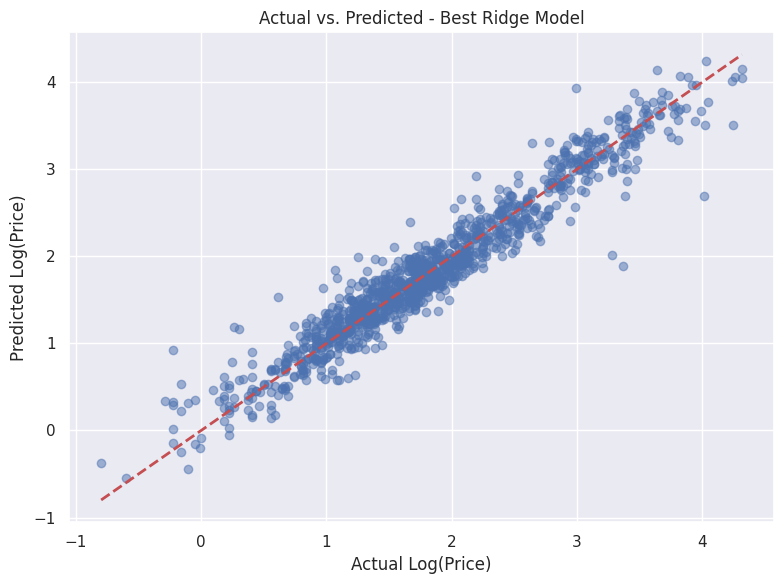

In [71]:
print("\nBest Ridge Parameters:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)
y_pred = grid.best_estimator_.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))
plot_predictions(y_test, y_pred, "Best Ridge Model")

In [72]:
pip install joblib

In [73]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [74]:
model = joblib.load('model.pkl')
preprocessor = joblib.load('preprocessor.pkl')

In [75]:
x_new = X_test.sample(1)
x_new

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Brand,Model,Age,Mileage(kmpl)
2574,Mumbai,83000,Diesel,Manual,Second,1598.0,103.6,5.0,Volkswagen,Vento,9,20.54


In [77]:
y_test[x_new.index]

,Price
2574,1.064711


In [78]:
np.expm1(y_test[x_new.index])

,Price
2574,1.9


In [79]:
# Preprocess new data
x_new_prep = preprocessor.transform(x_new)

# Predict (returns log(price), so exponentiate for actual price)
log_prices = model.predict(x_new_prep)
prices = np.exp(log_prices)  # Convert back to original scale
print("Predicted Prices:", prices[0])

Predicted Prices: 4.464305215560663
